In [1]:
import ultralytics
from ultralytics import YOLO
import torch
import cv2
import os
import matplotlib.pyplot as plt
import random


In [2]:
# Step 3: Explore dataset structure
import os

# Updated dataset path
data_dir =r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset"
print("Dataset contents:", os.listdir(data_dir))

# Step 4: Visualize a sample image and its corresponding label
import cv2
import matplotlib.pyplot as plt

# Define paths
train_images_dir = os.path.join(data_dir, r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images")
train_labels_dir = os.path.join(data_dir, r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels")

# Get a list of image and label files
image_files = sorted([f for f in os.listdir(train_images_dir) if f.endswith(".jpg")])
label_files = sorted([f for f in os.listdir(train_labels_dir) if f.endswith(".txt")])


Dataset contents: ['data.yaml', 'test', 'train', 'valid']


In [22]:
import os
from collections import defaultdict

data_dir = r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset"

train_images_dir = os.path.join(data_dir, "train", "images")
train_labels_dir = os.path.join(data_dir, "train", "labels")

# List image and label files
image_files = sorted([f for f in os.listdir(train_images_dir) if f.endswith(".jpg")])
label_files = sorted([f for f in os.listdir(train_labels_dir) if f.endswith(".txt")])

# Example class names as you provided:
class_names = [
    'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 
    'Speed Limit 110','Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 
    'Speed Limit 40','Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 
    'Speed Limit 80','Speed Limit 90', 'Stop', 'prohibitory', 'danger', 
    'mandatory', 'other','info_parking','mand_left','mand_right','mand_straight',
    'car','person'
]
num_classes = len(class_names)

# Count how many bounding boxes in each class
class_counts = defaultdict(int)

for label_file in label_files:
    with open(os.path.join(train_labels_dir, label_file), "r") as f:
        lines = f.readlines()
        for line in lines:
            # YOLO txt format typically: class_id x_center y_center width height
            splits = line.strip().split()
            if len(splits) == 5:
                class_id = int(splits[0])
                class_counts[class_id] += 1

print("Class distribution:")
for i, c_name in enumerate(class_names):
    print(f"{c_name} (class_id={i}): {class_counts[i]}")


Class distribution:
Green Light (class_id=0): 542
Red Light (class_id=1): 585
Speed Limit 10 (class_id=2): 19
Speed Limit 100 (class_id=3): 267
Speed Limit 110 (class_id=4): 101
Speed Limit 120 (class_id=5): 252
Speed Limit 20 (class_id=6): 285
Speed Limit 30 (class_id=7): 344
Speed Limit 40 (class_id=8): 235
Speed Limit 50 (class_id=9): 283
Speed Limit 60 (class_id=10): 301
Speed Limit 70 (class_id=11): 318
Speed Limit 80 (class_id=12): 323
Speed Limit 90 (class_id=13): 168
Stop (class_id=14): 327
prohibitory (class_id=15): 382
danger (class_id=16): 165
mandatory (class_id=17): 119
other (class_id=18): 188
info_parking (class_id=19): 359
mand_left (class_id=20): 190
mand_right (class_id=21): 128
mand_straight (class_id=22): 225
car (class_id=23): 329
person (class_id=24): 357


In [15]:
if image_files:
    first_image_path = os.path.join(train_images_dir, image_files[4810])
    first_label_path = os.path.join(train_labels_dir, label_files[4810])

    # Load and display the image
    img = cv2.imread(first_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Sample Image")
    plt.show()

    # Display corresponding label file
    with open(first_label_path, "r") as f:
        labels = f.readlines()
    print("Labels for the image:", labels)
else:
    print("No image files found in the specified directory.")


IndexError: list index out of range

In [9]:
# Check for dataset.yaml file
yaml_path = os.path.join(data_dir, "data.yaml")
assert os.path.exists(yaml_path), "YAML file missing!"

# Display contents of YAML file
with open(yaml_path, "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 
        'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 
        'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 
        'Speed Limit 90', 'Stop', 'prohibitory', 'danger', 'mandatory', 'other',
        'info_parking','mand_left','mand_right','mand_straight',car,'person']


roboflow:
  workspace: selfdriving-car-qtywx
  project: self-driving-cars-lfjou
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6


In [5]:
# Load YOLOv11 model
model = YOLO("C:/Users/basha/Downloads/yolo11n.pt")


In [14]:
# Train the YOLOv8 model
results = model.train(
    data=r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml",  # Path to dataset.yaml
    epochs=70,       # Number of training epochs
    batch=16,        # Batch size
    imgsz=416,       # Image size
    device='cuda' if torch.cuda.is_available() else 'cpu'  # Use GPU if available
)

New https://pypi.org/project/ultralytics/8.3.75 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/basha/Downloads/yolo11n.pt, data=C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, au

train: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels... 4820 images, 21

train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\00340.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145518.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145518.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145546.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145546.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145559.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive

train: New cache created: C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels.cache


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels... 1163 images, 6 ba

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'


val: New cache created: C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache
Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      1.11G     0.9647      3.869      1.124          8        416: 100%|██████████| 302/302 [02:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:21

                   all       1163       1567       0.21      0.279       0.17      0.127



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000001764DEFE020>
Traceback (most recent call last):
  File "C:\Users\basha\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "C:\Users\basha\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      1.07G     0.9212      2.662      1.079          5        416: 100%|██████████| 302/302 [03:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20


                   all       1163       1567      0.326      0.378      0.291      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      1.07G     0.8929      2.185      1.069          9        416: 100%|██████████| 302/302 [02:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:24


                   all       1163       1567      0.399      0.461      0.364      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      1.09G      0.855      1.947      1.053         15        416: 100%|██████████| 302/302 [01:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.451      0.476      0.446      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      1.08G     0.8271      1.742      1.039         11        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.551      0.515      0.521      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      1.08G     0.8096      1.549      1.034          9        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:16

                   all       1163       1567      0.655      0.512      0.561       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      1.08G     0.8005      1.442      1.024          8        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567       0.63      0.541      0.588      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      1.08G     0.7937      1.368       1.02         13        416: 100%|██████████| 302/302 [01:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.642      0.618      0.654      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      1.07G     0.7862      1.278      1.021          7        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.645      0.599      0.639      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      1.09G     0.7636      1.216      1.009         13        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.706      0.611      0.671      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      1.07G     0.7584      1.165      1.003          7        416: 100%|██████████| 302/302 [01:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.761      0.593      0.674      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      1.08G     0.7505      1.114      1.003          8        416: 100%|██████████| 302/302 [01:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.727      0.643      0.707      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      1.08G     0.7437      1.052      1.001         11        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.728      0.674      0.715      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      1.08G     0.7366      1.041     0.9922          9        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567       0.78      0.649      0.714      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      1.08G     0.7248      1.004     0.9908         10        416: 100%|██████████| 302/302 [01:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.75      0.668      0.726      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      1.08G     0.7155     0.9713     0.9841          4        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.814      0.645      0.733      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      1.07G     0.7153     0.9777     0.9826          8        416: 100%|██████████| 302/302 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.773       0.67      0.731      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      1.08G     0.7201     0.9474     0.9836         12        416: 100%|██████████| 302/302 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.759      0.675       0.73      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      1.07G     0.7046     0.9042     0.9795         12        416: 100%|██████████| 302/302 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.756      0.679      0.716      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      1.08G     0.7127     0.9067     0.9854          6        416: 100%|██████████| 302/302 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.802      0.659       0.73      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      1.07G     0.6953     0.8828     0.9774          7        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.803      0.661      0.739      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      1.08G     0.6978     0.8622     0.9828         12        416: 100%|██████████| 302/302 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567       0.83      0.667      0.745        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      1.07G     0.7014      0.855     0.9781         12        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.829      0.697      0.756      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      1.08G      0.685     0.8268     0.9698         10        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567        0.8      0.679      0.744      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      1.07G     0.6916     0.8164     0.9772          6        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.835      0.689      0.744      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      1.08G      0.675     0.8004     0.9655         11        416: 100%|██████████| 302/302 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.851      0.696      0.766      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      1.07G     0.6702     0.7924     0.9667          4        416: 100%|██████████| 302/302 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.826      0.713      0.764      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      1.08G     0.6765     0.7747     0.9689          8        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.806      0.692      0.744      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      1.07G     0.6764      0.772     0.9642         10        416: 100%|██████████| 302/302 [01:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.833      0.704      0.764      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      1.08G     0.6712     0.7716     0.9666         10        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.826      0.681      0.755      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      1.07G     0.6751     0.7484     0.9687          5        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.842      0.708      0.777      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      1.08G      0.672     0.7442     0.9681          6        416: 100%|██████████| 302/302 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.833      0.716      0.768      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      1.07G     0.6559     0.7442     0.9561          9        416: 100%|██████████| 302/302 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.823      0.707      0.777      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      1.08G     0.6596     0.7291     0.9609          8        416: 100%|██████████| 302/302 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.843      0.721       0.78      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      1.07G     0.6581     0.7214     0.9596         11        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.833      0.704      0.772      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      1.08G     0.6553     0.7208     0.9583         11        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.846      0.709      0.775      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      1.07G       0.65     0.7079     0.9544          9        416: 100%|██████████| 302/302 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.821      0.709      0.757      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      1.08G     0.6413     0.6832     0.9511          7        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.854      0.707      0.779      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      1.07G     0.6593     0.6952      0.957          7        416: 100%|██████████| 302/302 [01:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.872      0.715      0.795      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      1.08G     0.6484     0.6745     0.9577          9        416: 100%|██████████| 302/302 [01:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.832      0.715      0.779      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      1.11G     0.6405     0.6726     0.9502         13        416: 100%|██████████| 302/302 [01:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.855      0.724      0.795       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      1.08G     0.6401     0.6652     0.9557          9        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.872      0.727       0.79       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      1.07G     0.6303     0.6468      0.947         13        416: 100%|██████████| 302/302 [01:30<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.842      0.709      0.782      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      1.09G     0.6324     0.6574     0.9468         10        416: 100%|██████████| 302/302 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15


                   all       1163       1567      0.843      0.727      0.788      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      1.07G     0.6222     0.6404     0.9485          7        416: 100%|██████████| 302/302 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.853      0.728      0.791      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      1.08G     0.6321     0.6487     0.9517         10        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.86      0.723       0.79      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      1.07G     0.6157     0.6243     0.9391         10        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.873      0.715      0.793      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      1.08G     0.6226     0.6298     0.9437          6        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.813      0.728      0.773      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      1.07G     0.6111     0.6235     0.9432          5        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.844      0.724      0.792      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      1.08G     0.6224     0.6182     0.9444          7        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.862      0.738        0.8      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      1.07G     0.6176     0.5982     0.9473          6        416: 100%|██████████| 302/302 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.853      0.719      0.783      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      1.08G     0.6031     0.5941     0.9386          8        416: 100%|██████████| 302/302 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.849      0.735      0.794      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      1.07G     0.6077     0.6018     0.9347         11        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.857      0.698      0.781       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      1.08G     0.6083     0.5989     0.9401         12        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.863      0.721      0.794      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      1.07G      0.599     0.5924     0.9366         10        416: 100%|██████████| 302/302 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.88      0.703      0.789      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      1.08G     0.5919     0.5817     0.9347          7        416: 100%|██████████| 302/302 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.843       0.73      0.793       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      1.07G     0.5924     0.5717     0.9355          5        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.86      0.718      0.789      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      1.08G     0.5999     0.5743     0.9326          8        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.848      0.734      0.796      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      1.07G     0.6001     0.5742     0.9389         11        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.856      0.731      0.796      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      1.08G     0.5886     0.5678     0.9341          8        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.842      0.736        0.8      0.646


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      1.07G     0.5743     0.4178     0.8893          4        416: 100%|██████████| 302/302 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.857      0.734      0.795      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      1.08G     0.5706      0.405      0.882          5        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.87      0.717      0.795      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      1.07G     0.5645     0.4004     0.8849          4        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.873      0.726      0.804      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      1.08G      0.557     0.3894     0.8822          4        416: 100%|██████████| 302/302 [01:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.869      0.726      0.802      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      1.07G     0.5547     0.3861     0.8743          7        416: 100%|██████████| 302/302 [01:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.879      0.715      0.797      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      1.08G     0.5505     0.3844     0.8757          4        416: 100%|██████████| 302/302 [01:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.855      0.732      0.802      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      1.07G     0.5502     0.3819     0.8774         10        416: 100%|██████████| 302/302 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.862      0.747      0.807       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      1.08G     0.5508     0.3774     0.8761          4        416: 100%|██████████| 302/302 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.871      0.732      0.808      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      1.07G     0.5388     0.3727     0.8765          5        416: 100%|██████████| 302/302 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.874      0.727      0.809      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      1.08G       0.54      0.372     0.8715          4        416: 100%|██████████| 302/302 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.857      0.745      0.808       0.65



70 epochs completed in 2.002 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 5.5MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15


                   all       1163       1567      0.859      0.739      0.808      0.653
           Green Light         94        131      0.867      0.634      0.727      0.427
             Red Light         85        119      0.836       0.58      0.656      0.405
       Speed Limit 100         59         59       0.92      0.831      0.886      0.801
       Speed Limit 110         17         17      0.766      0.882      0.941      0.853
       Speed Limit 120         60         60          1      0.931      0.993      0.917
        Speed Limit 20         56         56      0.991      0.911       0.98      0.865
        Speed Limit 30         71         74      0.974      0.959      0.981      0.926
        Speed Limit 40         61         63      0.935       0.81       0.86      0.772
        Speed Limit 50         70         73       0.94      0.853      0.914      0.817
        Speed Limit 60         82         82      0.971      0.827      0.904      0.826
        Speed Limit 7

In [15]:
# Run validation
metrics = model.val()

Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:16


                   all       1163       1567      0.857       0.74      0.808      0.653
           Green Light         94        131      0.875      0.634      0.728       0.42
             Red Light         85        119      0.828       0.58      0.659      0.403
       Speed Limit 100         59         59       0.92      0.831      0.886      0.804
       Speed Limit 110         17         17      0.762      0.882      0.942      0.865
       Speed Limit 120         60         60          1      0.931      0.993      0.918
        Speed Limit 20         56         56       0.99      0.911       0.98      0.866
        Speed Limit 30         71         74      0.974      0.959      0.981      0.926
        Speed Limit 40         61         63      0.928       0.81       0.86      0.769
        Speed Limit 50         70         73       0.94      0.855      0.914      0.817
        Speed Limit 60         82         82      0.971      0.828      0.904      0.825
        Speed Limit 7


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\SNAG-00027_png_jpg.rf.f3e99d49df2c2c21b2dca8c6b091a3bc.jpg: 416x416 1 mand_left, 1 mand_straight, 15.5ms
Speed: 3.5ms preprocess, 15.5ms inference, 9.0ms postprocess per image at shape (1, 3, 416, 416)


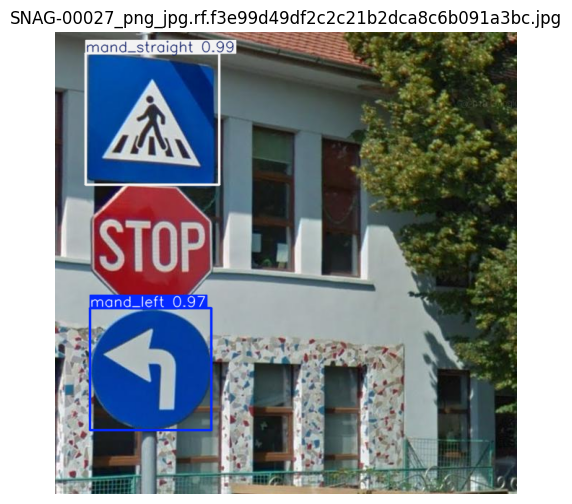


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\SNAG12-RADU_773_png.rf.ce696e521166efec60c7925d7979c24e.jpg: 416x416 1 info_parking, 37.4ms
Speed: 5.0ms preprocess, 37.4ms inference, 4.5ms postprocess per image at shape (1, 3, 416, 416)


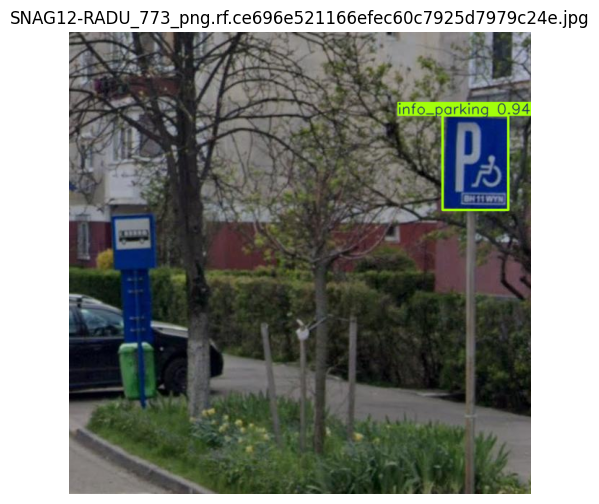


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\161_jpg.rf.21d188b7609cf30619cbcc37fc7193f9.jpg: 416x416 1 car, 30.7ms
Speed: 3.3ms preprocess, 30.7ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 416)


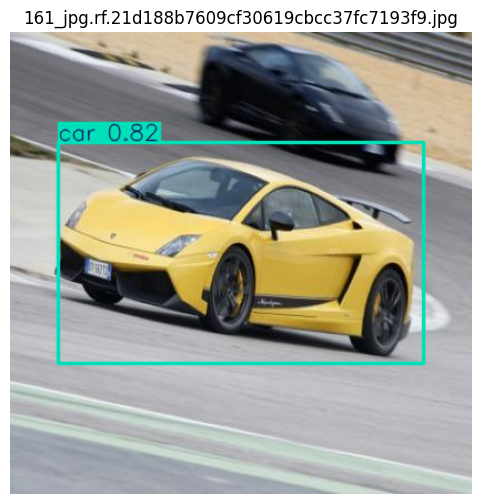


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\387_jpg.rf.aa7ec0bba04b3e65939fde84f13031d7.jpg: 416x416 6 persons, 49.9ms
Speed: 3.0ms preprocess, 49.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)


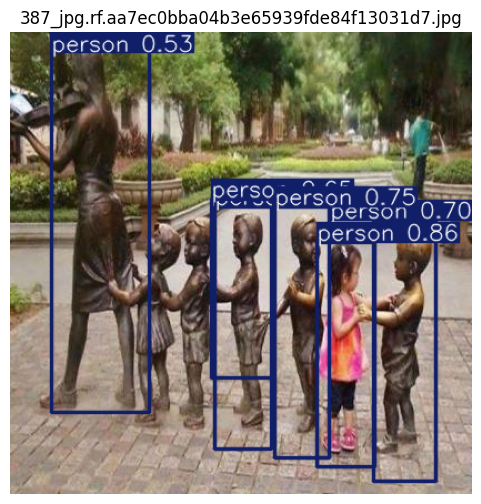


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\SNAG12-RADU_878_png.rf.9a8b6747d603e3b094df82ae6f728e80.jpg: 416x416 1 info_parking, 28.0ms
Speed: 4.0ms preprocess, 28.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 416)


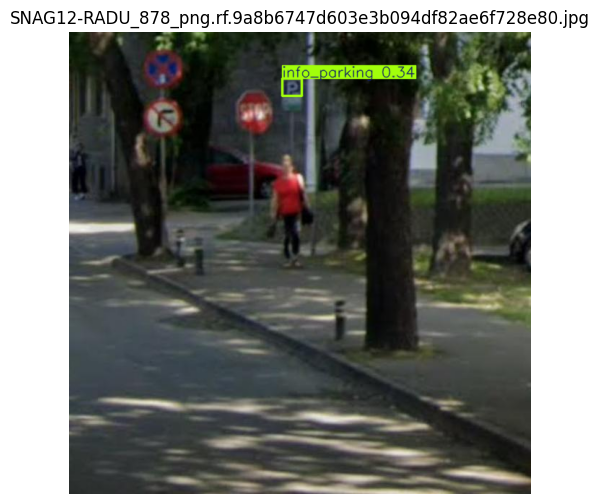

In [19]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define test images path
test_images_path = r"C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images"

# List all test image files
image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 5 images
selected_images = random.sample(image_files, 5)

# Loop over the selected images
for test_image in selected_images:
    test_image_path = os.path.join(test_images_path, test_image)
    
    # Run inference
    results = model(test_image_path)

    # Try using the correct attribute
    try:
        img_with_boxes = results[0].plot()  # For YOLOv8 or similar versions

        # Convert BGR to RGB
        img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(img_rgb)
        plt.title(test_image)
        plt.axis("off")
        plt.show()

    except AttributeError as e:
        print(f"Error processing {test_image}: {e}")


In [10]:
from ultralytics import YOLO

model = YOLO("runs/detect/train3/weights/best.pt")  # or "last.pt"

# Now train from these weights for more epochs
results = model.train(
    data=r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml",
    epochs=30,       # This will be 30 *new* epochs
    batch=16,
    imgsz=416,
    device='cuda'
)



New https://pypi.org/project/ultralytics/8.3.76 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/train3/weights/best.pt, data=C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

train: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels... 4911 images, 23

train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\00340.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145518.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145518.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145546.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145546.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145559.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive

train: New cache created: C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels.cache


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.09G     0.6012     0.5898      0.938         21        416: 100%|██████████| 307/307 [01:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.852      0.735      0.799      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.06G     0.6483     0.6414     0.9519         34        416: 100%|██████████| 307/307 [01:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.861      0.695      0.782      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.07G     0.6714     0.6889     0.9611         42        416: 100%|██████████| 307/307 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.825      0.659       0.75      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.07G     0.6829     0.7178     0.9654         35        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.85       0.71       0.79      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.07G     0.6802     0.7067      0.963         33        416: 100%|██████████| 307/307 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.853      0.688      0.778      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.06G     0.6725     0.7032     0.9652         31        416: 100%|██████████| 307/307 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.782      0.723      0.777      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.06G      0.682     0.7014      0.967         33        416: 100%|██████████| 307/307 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.846      0.705      0.786      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.07G     0.6807       0.69     0.9682         45        416: 100%|██████████| 307/307 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.824      0.701       0.76      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.06G     0.6707      0.679     0.9648         30        416: 100%|██████████| 307/307 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.859      0.708      0.778       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.07G     0.6675     0.6748     0.9613         33        416: 100%|██████████| 307/307 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.879        0.7      0.789      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.06G     0.6538     0.6675     0.9636         38        416: 100%|██████████| 307/307 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.847      0.714      0.776      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.07G      0.666     0.6559     0.9611         36        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.806       0.74      0.787       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.07G     0.6503     0.6455     0.9573         38        416: 100%|██████████| 307/307 [01:32<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20

                   all       1163       1567      0.775      0.728      0.779      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.07G     0.6476     0.6355      0.952         26        416: 100%|██████████| 307/307 [01:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.832      0.736      0.788      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.07G     0.6384     0.6224     0.9495         42        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.88      0.722       0.81      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.07G     0.6502      0.618     0.9559         38        416: 100%|██████████| 307/307 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.865      0.722      0.801      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.07G     0.6402     0.6124     0.9488         36        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.841      0.715       0.79      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.07G     0.6346     0.6013     0.9482         27        416: 100%|██████████| 307/307 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.887      0.714      0.808       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.07G     0.6236     0.5886     0.9486         32        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.869      0.732      0.805      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.06G     0.6258     0.5789      0.945         47        416: 100%|██████████| 307/307 [01:36<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20

                   all       1163       1567      0.841      0.763      0.812      0.651


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.07G     0.6089     0.4283     0.8991         22        416: 100%|██████████| 307/307 [02:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:19

                   all       1163       1567      0.866      0.721      0.809      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.07G     0.5975     0.4112     0.8996         16        416: 100%|██████████| 307/307 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.824      0.763      0.808      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.07G     0.5877     0.4001     0.8895         18        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.86      0.738      0.805      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.07G     0.5869     0.3943     0.8875         21        416: 100%|██████████| 307/307 [01:30<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.844      0.755      0.816      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.07G      0.573     0.3813     0.8895         23        416: 100%|██████████| 307/307 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.829       0.75       0.81      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.07G     0.5728     0.3749     0.8865         27        416: 100%|██████████| 307/307 [01:35<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.851      0.753      0.808       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.07G     0.5657     0.3711     0.8823         19        416: 100%|██████████| 307/307 [01:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567       0.86      0.755      0.815      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.07G     0.5589     0.3605     0.8769         19        416: 100%|██████████| 307/307 [01:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.874      0.743      0.815      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.07G     0.5548     0.3569     0.8791         20        416: 100%|██████████| 307/307 [01:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.886      0.747      0.818      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.07G     0.5416     0.3474     0.8756         25        416: 100%|██████████| 307/307 [01:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:16

                   all       1163       1567       0.88       0.75      0.818      0.659



30 epochs completed in 0.915 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 5.4MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:18


                   all       1163       1567      0.888      0.747      0.818      0.659
           Green Light         94        131       0.87      0.611       0.71      0.421
             Red Light         85        119      0.892      0.555      0.681      0.406
       Speed Limit 100         59         59      0.927      0.831      0.893       0.81
       Speed Limit 110         17         17      0.959      0.765      0.911      0.849
       Speed Limit 120         60         60          1      0.983      0.994      0.906
        Speed Limit 20         56         56          1      0.935      0.986      0.881
        Speed Limit 30         71         74      0.989      0.959      0.983      0.907
        Speed Limit 40         61         63      0.895       0.81      0.869       0.78
        Speed Limit 50         70         73      0.968      0.836      0.916      0.823
        Speed Limit 60         82         82      0.945      0.841      0.896      0.816
        Speed Limit 7

In [11]:
# Run validation
metrics = model.val()

Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:17


                   all       1163       1567      0.873      0.755      0.818      0.659
           Green Light         94        131       0.87      0.626       0.71      0.423
             Red Light         85        119      0.866      0.598      0.683      0.405
       Speed Limit 100         59         59      0.924      0.831      0.893       0.81
       Speed Limit 110         17         17      0.949      0.765       0.91      0.848
       Speed Limit 120         60         60      0.985      0.983      0.994      0.906
        Speed Limit 20         56         56          1      0.938      0.986       0.88
        Speed Limit 30         71         74      0.987      0.959      0.983      0.908
        Speed Limit 40         61         63      0.896      0.819       0.87       0.78
        Speed Limit 50         70         73      0.943      0.836      0.907       0.82
        Speed Limit 60         82         82      0.945      0.845      0.896      0.815
        Speed Limit 7


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\SNAG-00027_png_jpg.rf.f3e99d49df2c2c21b2dca8c6b091a3bc.jpg: 416x416 1 mand_left, 1 mand_straight, 27.0ms
Speed: 6.0ms preprocess, 27.0ms inference, 94.7ms postprocess per image at shape (1, 3, 416, 416)


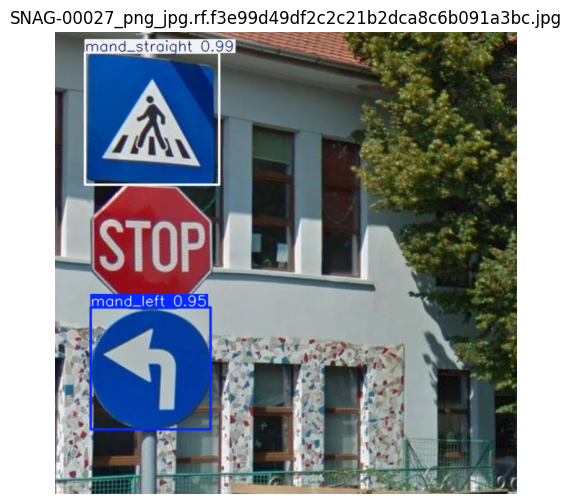


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\SNAG12-RADU_773_png.rf.ce696e521166efec60c7925d7979c24e.jpg: 416x416 2 info_parkings, 28.0ms
Speed: 4.5ms preprocess, 28.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 416)


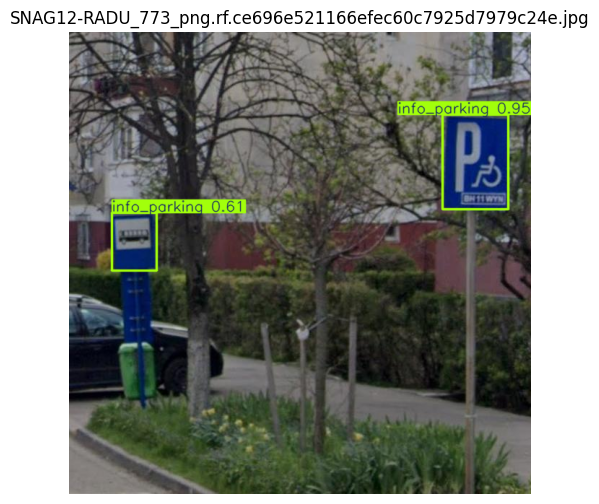


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\161_jpg.rf.21d188b7609cf30619cbcc37fc7193f9.jpg: 416x416 1 car, 28.0ms
Speed: 3.2ms preprocess, 28.0ms inference, 4.1ms postprocess per image at shape (1, 3, 416, 416)


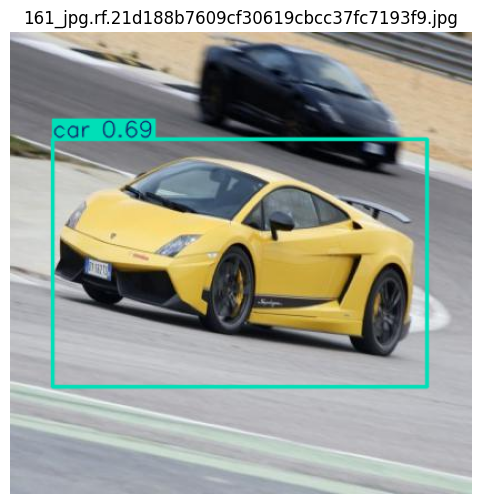


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\387_jpg.rf.aa7ec0bba04b3e65939fde84f13031d7.jpg: 416x416 6 persons, 28.0ms
Speed: 3.0ms preprocess, 28.0ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 416)


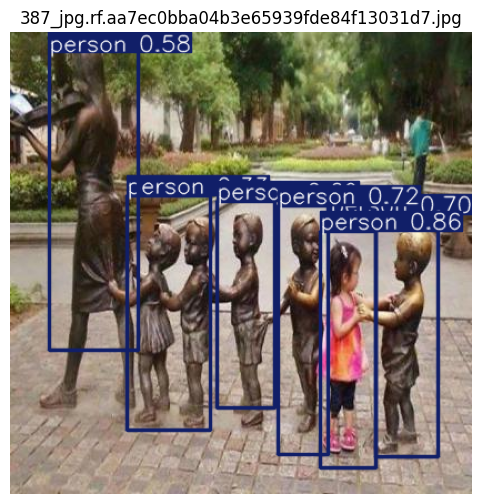


image 1/1 C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images\SNAG12-RADU_878_png.rf.9a8b6747d603e3b094df82ae6f728e80.jpg: 416x416 2 info_parkings, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


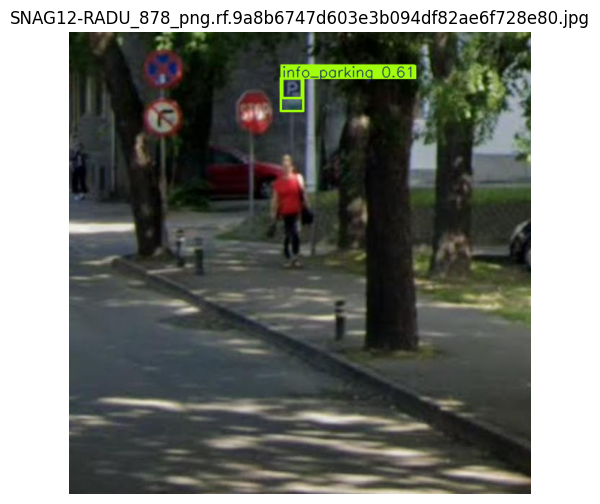

In [12]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define test images path
test_images_path = r"C:\Users\basha\OneDrive\Desktop\Auto_Car\dataset_filtered\valid\images"

# List all test image files
image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 5 images
selected_images = random.sample(image_files, 5)

# Loop over the selected images
for test_image in selected_images:
    test_image_path = os.path.join(test_images_path, test_image)
    
    # Run inference
    results = model(test_image_path)

    # Try using the correct attribute
    try:
        img_with_boxes = results[0].plot()  # For YOLOv8 or similar versions

        # Convert BGR to RGB
        img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(img_rgb)
        plt.title(test_image)
        plt.axis("off")
        plt.show()

    except AttributeError as e:
        print(f"Error processing {test_image}: {e}")


In [23]:
from ultralytics import YOLO

model = YOLO("runs/detect/train5/weights/best.pt")  # or "last.pt"

# Now train from these weights for more epochs
results = model.train(
    data=r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml",
    epochs=50,       # This will be 50 *new* epochs
    batch=16,
    imgsz=416,
    device='cuda'
)


Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/train5/weights/best.pt, data=C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels... 5125 images, 28

train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\00340.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145518.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145518.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145546.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145546.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145559.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive

train: New cache created: C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels.cache


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.11G     0.6449     0.6057     0.9515         16        416: 100%|██████████| 321/321 [01:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.833      0.747      0.801      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.09G     0.6774     0.6268     0.9599          7        416: 100%|██████████| 321/321 [01:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567      0.853       0.74        0.8       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.08G     0.7145     0.6724     0.9729          7        416: 100%|██████████| 321/321 [01:42<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:16

                   all       1163       1567      0.875      0.688       0.79      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.09G     0.7264     0.7119     0.9786          9        416: 100%|██████████| 321/321 [01:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.877      0.714      0.798      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.1G     0.7112     0.6896      0.976         12        416: 100%|██████████| 321/321 [01:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.869      0.715      0.799      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.1G     0.7111     0.6983     0.9733          9        416: 100%|██████████| 321/321 [01:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.865      0.724      0.796      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.08G     0.7215     0.6895     0.9768         17        416: 100%|██████████| 321/321 [01:34<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.841        0.7       0.78      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.09G      0.706     0.6828      0.973         17        416: 100%|██████████| 321/321 [01:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.854      0.721      0.794      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.1G     0.7147     0.6767     0.9733          9        416: 100%|██████████| 321/321 [01:32<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567       0.84      0.723      0.788      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.09G     0.7028     0.6667     0.9714         15        416: 100%|██████████| 321/321 [01:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567      0.844      0.742      0.798      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.08G     0.7043     0.6652     0.9686         15        416: 100%|██████████| 321/321 [01:34<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.878      0.712      0.802      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.09G     0.6973      0.661     0.9689         13        416: 100%|██████████| 321/321 [01:35<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567      0.831      0.743      0.785       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.1G     0.7127     0.6603     0.9723          8        416: 100%|██████████| 321/321 [01:34<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567      0.842      0.753      0.803       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.1G     0.7032     0.6399     0.9657         12        416: 100%|██████████| 321/321 [01:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.892      0.686      0.785      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.09G      0.687     0.6403     0.9574         14        416: 100%|██████████| 321/321 [02:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:16

                   all       1163       1567      0.846      0.723      0.784      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.09G     0.6932     0.6378     0.9665          7        416: 100%|██████████| 321/321 [01:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15

                   all       1163       1567      0.894      0.716      0.809       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.09G       0.68     0.6275     0.9595          9        416: 100%|██████████| 321/321 [01:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.877      0.709      0.789      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.09G     0.6899     0.6242     0.9644         11        416: 100%|██████████| 321/321 [01:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567      0.869      0.726      0.804      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.08G     0.6758     0.6117     0.9574         11        416: 100%|██████████| 321/321 [01:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.85      0.742      0.798      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.09G     0.6809     0.6168     0.9604         12        416: 100%|██████████| 321/321 [01:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.843      0.722      0.787      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.09G     0.6612     0.6041     0.9523          9        416: 100%|██████████| 321/321 [01:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.848      0.729      0.794      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.09G      0.671     0.6026     0.9554          7        416: 100%|██████████| 321/321 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.825      0.746      0.796      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.08G     0.6628     0.5976     0.9484          8        416: 100%|██████████| 321/321 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.839      0.744      0.808      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.09G     0.6763     0.5968     0.9551         15        416: 100%|██████████| 321/321 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567       0.84      0.737      0.787      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.1G     0.6607     0.5874     0.9511         18        416: 100%|██████████| 321/321 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.891      0.736      0.808      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.09G     0.6561     0.5803     0.9501         11        416: 100%|██████████| 321/321 [01:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.876      0.719      0.797      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.11G      0.655     0.5554     0.9486         11        416: 100%|██████████| 321/321 [01:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.863      0.765      0.803      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.09G     0.6582     0.5722     0.9479          9        416: 100%|██████████| 321/321 [01:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:33

                   all       1163       1567      0.881      0.754      0.818      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.09G       0.64     0.5538     0.9437         13        416: 100%|██████████| 321/321 [02:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.829      0.741      0.801      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.09G     0.6428     0.5506     0.9452         12        416: 100%|██████████| 321/321 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.869      0.749      0.806       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.09G     0.6391     0.5524     0.9431         19        416: 100%|██████████| 321/321 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.862      0.746      0.807      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.09G     0.6457      0.555     0.9461          7        416: 100%|██████████| 321/321 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.867      0.741      0.804      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.1G     0.6284     0.5385     0.9405          5        416: 100%|██████████| 321/321 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.859      0.754      0.814      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.09G     0.6385     0.5417     0.9433         15        416: 100%|██████████| 321/321 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.846      0.767      0.814      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.08G     0.6183     0.5227     0.9352          9        416: 100%|██████████| 321/321 [01:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.861      0.771      0.826       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.09G     0.6253     0.5173     0.9386         10        416: 100%|██████████| 321/321 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.875      0.761       0.82      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.1G     0.6186     0.5119     0.9338         10        416: 100%|██████████| 321/321 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.877      0.746      0.815      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       1.1G     0.6146     0.5186     0.9334         15        416: 100%|██████████| 321/321 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.862      0.768      0.819      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.08G     0.6132     0.5101     0.9338         10        416: 100%|██████████| 321/321 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.861      0.765       0.82      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.09G     0.6101     0.5074     0.9331         17        416: 100%|██████████| 321/321 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.867      0.761      0.816      0.657
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.1G     0.5956     0.3759     0.8919          7        416: 100%|██████████| 321/321 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.879      0.738      0.805      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       1.1G     0.5915      0.362     0.8871          5        416: 100%|██████████| 321/321 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.886      0.743      0.812      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.08G     0.5887     0.3572     0.8878          9        416: 100%|██████████| 321/321 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.881      0.751      0.813      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.1G     0.5845     0.3504      0.883         10        416: 100%|██████████| 321/321 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.884      0.751      0.824      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.1G     0.5759     0.3506     0.8819          7        416: 100%|██████████| 321/321 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.868      0.758      0.816       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.1G     0.5705      0.348      0.875          7        416: 100%|██████████| 321/321 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567       0.89      0.754      0.818      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.08G      0.558     0.3396     0.8767          6        416: 100%|██████████| 321/321 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.866      0.757      0.814      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.1G     0.5606     0.3382     0.8743          5        416: 100%|██████████| 321/321 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.881      0.752      0.821      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.1G     0.5534     0.3321      0.875          6        416: 100%|██████████| 321/321 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.883      0.758      0.824      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.1G     0.5518     0.3288     0.8749          7        416: 100%|██████████| 321/321 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.886      0.755      0.819      0.662

50 epochs completed in 1.514 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 5.4MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:16


                   all       1163       1567      0.895      0.746      0.824      0.664
           Green Light         94        131      0.886      0.594      0.712       0.42
             Red Light         85        119      0.908      0.546      0.666      0.407
       Speed Limit 100         59         59       0.95      0.864      0.881      0.805
       Speed Limit 110         17         17      0.955      0.765      0.928      0.848
       Speed Limit 120         60         60      0.975      0.967      0.994      0.919
        Speed Limit 20         56         56          1      0.976      0.987      0.876
        Speed Limit 30         71         74          1       0.96      0.982      0.923
        Speed Limit 40         61         63      0.928      0.816      0.863      0.771
        Speed Limit 50         70         73      0.975      0.836      0.924      0.825
        Speed Limit 60         82         82      0.959      0.848      0.898      0.811
        Speed Limit 7

In [24]:
# Run validation
metrics = model.val()

Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:16


                   all       1163       1567       0.88      0.757      0.823      0.664
           Green Light         94        131      0.867      0.634      0.711      0.419
             Red Light         85        119      0.882       0.58      0.666      0.408
       Speed Limit 100         59         59      0.935      0.864       0.88      0.806
       Speed Limit 110         17         17      0.944      0.765      0.928      0.849
       Speed Limit 120         60         60      0.971      0.967      0.994      0.922
        Speed Limit 20         56         56      0.998      0.982      0.987      0.878
        Speed Limit 30         71         74          1      0.966      0.982      0.928
        Speed Limit 40         61         63      0.928      0.823      0.863      0.771
        Speed Limit 50         70         73      0.951      0.836      0.923      0.827
        Speed Limit 60         82         82      0.959      0.852      0.898      0.813
        Speed Limit 7

In [3]:
from ultralytics import YOLO

model = YOLO("runs/detect/train12/weights/best.pt")  # or "last.pt"

# Now train from these weights for more epochs
results = model.train(
    data=r"C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml",
    epochs=30,       # This will be 50 *new* epochs
    batch=16,
    imgsz=416,
    device='cuda'
)


New https://pypi.org/project/ultralytics/8.3.77 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/train12/weights/best.pt, data=C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, a

train: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\labels.cache... 5171 imag

train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\00340.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145518.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145518.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145546.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\train\\images\\Screenshot 2025-02-16 145546.png'
train: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\train\images\Screenshot 2025-02-16 145559.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'


Plotting labels to runs\detect\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train13
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.11G     0.6048     0.4853     0.9308          4        416: 100%|██████████| 324/324 [01:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.867       0.74      0.807      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       1.1G      0.619     0.4943     0.9295          3        416: 100%|██████████| 324/324 [01:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567      0.896      0.729      0.807      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       1.1G     0.6406     0.5284     0.9382          5        416: 100%|██████████| 324/324 [01:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14

                   all       1163       1567       0.84      0.725      0.788      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.09G     0.6428     0.5397     0.9393          5        416: 100%|██████████| 324/324 [01:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:15


                   all       1163       1567      0.859      0.733      0.794      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.09G      0.657     0.5557     0.9421          5        416: 100%|██████████| 324/324 [02:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20

                   all       1163       1567      0.811      0.758      0.798      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.09G     0.6529     0.5429      0.944          7        416: 100%|██████████| 324/324 [01:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.855      0.751      0.801       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       1.1G      0.645     0.5422     0.9385          5        416: 100%|██████████| 324/324 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.846      0.744      0.797      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.09G     0.6433     0.5276     0.9414          7        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.822      0.751      0.799      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       1.1G      0.646     0.5302     0.9425          8        416: 100%|██████████| 324/324 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.882      0.736      0.805      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       1.1G     0.6285     0.5236     0.9342          5        416: 100%|██████████| 324/324 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.848      0.736      0.798      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.09G     0.6385     0.5163     0.9408          7        416: 100%|██████████| 324/324 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.842      0.744        0.8      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.09G     0.6312     0.5161     0.9359          9        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.88      0.753      0.813      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.09G      0.632     0.5122     0.9387         11        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.845      0.734      0.795      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.09G     0.6295     0.5071     0.9328          7        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567       0.84      0.771      0.812      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.09G     0.6326     0.5102     0.9386          3        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.891      0.759      0.823      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.09G     0.6234     0.5019     0.9334          7        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567       0.88      0.719      0.802      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       1.1G     0.6199     0.4991     0.9298          9        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.862      0.758      0.812      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.09G      0.606     0.4805     0.9272          8        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.859      0.768      0.821      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       1.1G     0.6115     0.4859     0.9275          6        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.884      0.752      0.811      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.09G     0.6067     0.4839      0.928          4        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.852      0.756      0.813      0.653
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       1.1G     0.5855     0.3566     0.8813          5        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.878      0.761       0.82      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       1.1G     0.5765     0.3479     0.8778          3        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.835      0.774      0.806      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       1.1G     0.5755      0.341     0.8784          4        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.864      0.762      0.815      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       1.1G     0.5661     0.3314     0.8715          3        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.876      0.768      0.819      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       1.1G     0.5614     0.3307     0.8715          3        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13

                   all       1163       1567      0.895      0.756      0.824      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       1.1G     0.5572     0.3284     0.8671          6        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567       0.85      0.782      0.825      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       1.1G     0.5566     0.3223     0.8696          7        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12

                   all       1163       1567      0.887      0.766      0.822      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       1.1G     0.5531     0.3179     0.8707          5        416: 100%|██████████| 324/324 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13


                   all       1163       1567      0.897      0.761      0.824      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       1.1G     0.5448     0.3128     0.8669          4        416: 100%|██████████| 324/324 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.872      0.777      0.824      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.09G      0.542     0.3132      0.867          4        416: 100%|██████████| 324/324 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12


                   all       1163       1567      0.894      0.763      0.827      0.666

30 epochs completed in 0.881 hours.
Optimizer stripped from runs\detect\train13\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train13\weights\best.pt, 5.4MB

Validating runs\detect\train13\weights\best.pt...
Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:14


                   all       1163       1567      0.894      0.763      0.827      0.667
           Green Light         94        131      0.854      0.627      0.709      0.432
             Red Light         85        119      0.881      0.559      0.694      0.427
       Speed Limit 100         59         59      0.939      0.864      0.886      0.806
       Speed Limit 110         17         17          1      0.764      0.856      0.793
       Speed Limit 120         60         60      0.952      0.984      0.995      0.912
        Speed Limit 20         56         56          1      0.976      0.987      0.883
        Speed Limit 30         71         74      0.947       0.97      0.983      0.922
        Speed Limit 40         61         63      0.902      0.841      0.871      0.779
        Speed Limit 50         70         73      0.966      0.836      0.931      0.825
        Speed Limit 60         82         82      0.959      0.858      0.901      0.826
        Speed Limit 7

In [4]:
# Run validation
metrics = model.val()

Ultralytics 8.3.40  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\labels.cache... 1163 images

val: WARNING  C:\Users\basha\OneDrive\Desktop\Auto_Car\autonomous_driving_car_dataset\valid\images\Screenshot 2025-02-16 191030.png: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\basha\\OneDrive\\Desktop\\Auto_Car\\autonomous_driving_car_dataset\\valid\\images\\Screenshot 2025-02-16 191030.png'



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:16


                   all       1163       1567      0.893      0.764      0.827      0.666
           Green Light         94        131      0.865      0.636       0.72      0.434
             Red Light         85        119      0.882      0.563       0.69      0.426
       Speed Limit 100         59         59      0.938      0.864      0.886       0.81
       Speed Limit 110         17         17          1      0.765      0.855      0.785
       Speed Limit 120         60         60      0.952      0.984      0.995       0.91
        Speed Limit 20         56         56          1      0.976      0.987      0.886
        Speed Limit 30         71         74      0.947      0.971      0.983      0.922
        Speed Limit 40         61         63      0.898      0.842      0.871      0.776
        Speed Limit 50         70         73      0.966      0.836       0.93      0.828
        Speed Limit 60         82         82      0.959      0.859        0.9      0.824
        Speed Limit 7

In [1]:
import cv2
import math
from ultralytics import YOLO
import cvzone
import pygame
import threading

# Load YOLO model
model = YOLO("C:/Users/basha/Downloads/fire.pt")

# Define classnames
classnames = ['fire','smoke']

# Initialize pygame mixer
pygame.mixer.init()

# Alarm sound file path
alarm_sound_path = "C:/Users/basha/Downloads/Telegram Desktop/loud_alarm_1.mp3"
pygame.mixer.music.load(alarm_sound_path)

# Flag to control alarm
alarm_triggered = False

# Function to play alarm sound
def play_alarm():
    global alarm_triggered
    pygame.mixer.music.play(-1)  # Play sound in a loop
    alarm_triggered = True

# Function to stop alarm sound
def stop_alarm():
    global alarm_triggered
    if pygame.mixer.music.get_busy():
        pygame.mixer.music.stop()
    alarm_triggered = False

# Use mobile IP camera instead of the laptop camera
CAMERA_SOURCE = "http://192.168.1.100:8080/video"
cap = cv2.VideoCapture(CAMERA_SOURCE)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize frame for consistency
    frame = cv2.resize(frame, (640, 480))

    # Get predictions from YOLO model
    results = model(frame, stream=True)

    # Flag to track if fire is detected in the current frame
    fire_detected = False

    # Process each result
    for result in results:
        boxes = result.boxes  # Extract detected boxes
        for box in boxes:
            confidence = box.conf[0]  # Confidence score
            confidence = math.ceil(confidence * 100)  # Convert to percentage
            Class = int(box.cls[0])  # Class index

            # Ensure valid class index and confidence threshold
            if confidence > 50 and classnames[Class] == 'fire':
                # Fire detected
                fire_detected = True

                # Get box coordinates
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # Draw bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                cvzone.putTextRect(frame, f'{classnames[Class]} {confidence}%', [x1, y1 - 10],
                                   scale=1.5, thickness=2, colorT=(0, 255, 0), colorR=(0, 0, 255))

    # Trigger or stop the alarm based on detection
    if fire_detected:
        if not alarm_triggered:
            threading.Thread(target=play_alarm).start()
    else:
        if alarm_triggered:
            stop_alarm()

    # Display the frame with annotations
    cv2.imshow("Fire Detection", frame)

    # Exit the loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt



In [3]:
import cv2
import torch
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = r"C:\Users\basha\runs\detect\train13\weights\best.pt"
model = YOLO(model_path)

# Define IP Camera URL
ip_camera_url = "http://192.168.1.103:8080/video"  # Replace with your actual IP stream

# Open the IP camera stream
cap = cv2.VideoCapture(ip_camera_url)

if not cap.isOpened():
    print("⚠️ Error: Could not open video stream. Check IP URL!")
    exit()

# Run real-time object detection
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("⚠️ Error: Failed to retrieve frame.")
        break

    # Resize frame for faster processing
    frame = cv2.resize(frame, (640, 480))
    
    # Run YOLOv8 inference on the resized frame
    results = model(frame, conf=0.3)  # Adjust confidence threshold if needed

    # Draw detections on the frame
    annotated_frame = results[0].plot()

    # Display the output
    cv2.imshow("YOLOv8 Live Detection", annotated_frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()



0: 320x416 (no detections), 14.7ms
Speed: 4.0ms preprocess, 14.7ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 31.2ms
Speed: 2.5ms preprocess, 31.2ms inference, 2.5ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 20.8ms
Speed: 1.0ms preprocess, 20.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 16.7ms
Speed: 2.7ms preprocess, 16.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 21.5ms
Speed: 1.9ms preprocess, 21.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 7.0ms
Speed: 2.2ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 7.0ms
Speed: 2.3ms preprocess, 7.0ms infer


0: 320x416 (no detections), 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.5ms
Speed: 2.0ms preprocess, 17.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.6ms
Speed: 1.1ms preprocess, 17.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 11.1ms
Speed: 2.0ms preprocess, 11.1ms infer

Speed: 2.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 23.0ms
Speed: 2.0ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 20.2ms
Speed: 3.0ms preprocess, 20.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.1ms
Speed: 3.0ms preprocess, 17.1ms inference, 1.0ms postprocess per image 


0: 320x416 (no detections), 10.1ms
Speed: 1.2ms preprocess, 10.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 11.8ms
Speed: 3.3ms preprocess, 11.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.5ms
Speed: 3.2ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.5ms
Speed: 1.5ms preprocess, 10.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 14.5ms
Speed: 2.0ms preprocess, 14.5ms inf


0: 320x416 (no detections), 13.0ms
Speed: 2.4ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.9ms
Speed: 1.0ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 14.0ms
Speed: 5.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.0ms
Speed: 2.0ms preprocess, 15.0ms i


0: 320x416 (no detections), 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 4.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 11.9ms
Speed: 3.1ms preprocess, 11.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.0ms
Speed: 2.0ms preprocess, 15.0ms i


0: 320x416 (no detections), 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.1ms
Speed: 2.5ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms i

Speed: 3.0ms preprocess, 11.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 14.5ms
Speed: 3.0ms preprocess, 14.5ms inference, 7.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 16.2ms
Speed: 3.0ms preprocess, 16.2ms inference, 1.0ms postprocess per imag


0: 320x416 (no detections), 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 11.0ms
Speed: 2.4ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 0.0ms postprocess 


0: 320x416 (no detections), 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 80, 11.9ms
Speed: 3.1ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.0ms
Speed: 3.1ms preprocess, 15.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 4.3ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 14.0ms
Speed: 2.0ms preprocess, 14.0ms 


0: 320x416 1 info_parking, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.3ms
Speed: 2.1ms preprocess, 17.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.7ms
Speed: 3.0ms preprocess, 15.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 3.0ms preprocess, 12.0ms infe


0: 320x416 1 car, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 car, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 car, 11.5ms
Speed: 3.0ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 car, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.2ms
Speed: 3.0ms preprocess, 17.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.0ms postprocess per image at

Speed: 1.2ms preprocess, 13.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 mand_left, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 1 mand_left, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 1 mand_left, 17.0ms
Speed: 2.4ms preprocess, 17.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 50, 1 Speed Limit 90, 1 mand_left, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 50, 1 mand_left, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 1 mand_left, 11.7ms
Speed: 1.0ms


0: 320x416 1 mand_left, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 11.7ms
Speed: 1.0ms preprocess, 11.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 11.5ms
Speed: 22.0ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 10.8ms
Speed: 1.0ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 12.1ms
Speed: 1.0ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 13.0ms
Speed: 3.4ms preprocess, 13.0ms inference, 1.4ms postprocess per

Speed: 2.5ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 12.0ms
Speed: 3.5ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 13.1ms
Speed: 2.8ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 12.5ms
Speed: 15.0ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416


0: 320x416 (no detections), 13.4ms
Speed: 3.1ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.1ms
Speed: 5.0ms preprocess, 13.1ms inference, 12.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.2ms
Speed: 1.0ms preprocess, 13.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 car, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference,


0: 320x416 1 info_parking, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 12.0ms
Speed: 3.3ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 14.5ms
Speed: 3.0ms preprocess, 14.5ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.9ms
Speed: 2.4ms preprocess, 13.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inferenc


0: 320x416 (no detections), 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 info_parking, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.3ms
Speed: 3.0ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 3.4ms preprocess, 13.0ms inf


0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.5ms
Speed: 4.0ms preprocess, 15.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.2ms
Speed: 6.0ms preprocess, 12.2ms inference,


0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 13.0ms
Speed: 3.5ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 80, 1 Speed Limit 90, 16.4ms
Speed: 3.0ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 30, 1 Speed Limit 90, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 60, 1 Speed Limit 90, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Speed Limit 40, 1 Speed Limit 90, 12.9ms
Speed: 3.1ms pr


0: 320x416 (no detections), 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 10.5ms
Speed: 0.9ms preprocess, 10.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 14.0ms
Speed: 3.9ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 Stop, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 32


0: 320x416 (no detections), 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.4ms
Speed: 3.9ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 4.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.8ms
Speed: 3.0ms preprocess, 13.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 mand_left, 14.2ms
Speed: 3.0ms preprocess, 14.2ms infer


0: 320x416 (no detections), 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 11.0ms
Speed: 2.5ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 11.8ms
Speed: 1.0ms preprocess, 11.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 10.5ms
Speed: 1.0ms preprocess, 10.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.5ms
Speed: 1.0ms preprocess, 9.5ms inference, 1.0ms postproce


0: 320x416 (no detections), 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 10.3ms
Speed: 3.0ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 11.0ms
Speed: 8.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 11.3ms
Speed: 1.4ms preprocess, 11.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.5ms postprocess per image at shape (1


0: 320x416 1 person, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 13.5ms
Speed: 1.0ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 12.5ms
Speed: 3.7ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 13.0ms
Speed: 1.1ms preprocess, 13.0ms inference, 0.9ms postprocess per image at shape (1, 3,

Speed: 2.0ms preprocess, 13.1ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 4.4ms preprocess, 12.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 17.2ms
Speed: 2.7ms preprocess, 17.2ms inference, 1.0ms postprocess per image at sh


0: 320x416 2 persons, 15.5ms
Speed: 3.0ms preprocess, 15.5ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 12.1ms
Speed: 3.3ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 15.0ms
Speed: 3.1ms preprocess, 15.0ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 14.0ms
Speed: 3.1ms preprocess, 14.0ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 13.1ms
Speed: 2.9ms preprocess, 13.1ms inference, 17.6ms postprocess per image at shape 


0: 320x416 1 person, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 16.4ms
Speed: 1.1ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 14.1ms
Speed: 3.0ms preprocess, 14.1ms inference, 1.9ms postprocess per image at shape (


0: 320x416 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.0ms
Speed: 0.9ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.9ms
Speed: 1.1ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.5ms
Speed: 3.0ms preprocess, 10.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.2ms
Speed: 1.0ms preprocess, 10.2ms i

Speed: 3.1ms preprocess, 17.8ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 2 persons, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 person, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detect


0: 320x416 (no detections), 9.9ms
Speed: 4.0ms preprocess, 9.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.9ms
Speed: 1.0ms preprocess, 10.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.5ms
Speed: 1.0ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 0.


0: 320x416 (no detections), 10.4ms
Speed: 1.2ms preprocess, 10.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.5ms
Speed: 1.0ms preprocess, 10.5ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.6ms
Speed: 1.0ms preprocess, 10.6ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.2ms
Speed: 1.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms infer


0: 320x416 1 car, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)
